In [64]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sys
sys.path.append("../../Code")
sys.path.append("../Tools/python-client")
import settings as s
import utils 
import sql
import files
import seaborn as sns
import languages as lang
import preprocessing as pre

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get Manhattan Data

In [66]:
listings, reviews, hosts, guests, host_trips, host_reviews = sql.get_manhattan_data()

Retrieved 21473 Manhattan listings
Retrieved 433320 Manhattan reviews
Retrieved 18633 Manhattan hosts
Retrieved only 14839 (79.64%) Manhattan hosts with reviews
Retrieved 11345 Manhattan host trips
Retrieved 442380 reviews from hosts who have hosted Manhattan Guests
Total Number of 397693 guests that have reviewed Manhattan listings
Retrieved 192768 (48.47%) guests that have reviewed Manhattan listings


In [67]:
listings.head(1)

,idListing,id,host_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,street,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1,2515,2758,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and enjoy your artistic Guest room with original artwork from NY artists. Shared with my little family however we often out and you won't see us much. across the street from Central Park - the busy city minutes away but sleeping in quiet at night!,"-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUEST FOR DATES CALENDAR IS UP TO DATE ALL AIRBNB RESERVATIONS WILL BE HONORED Nice, comfortable, and clean private guest room with shared bathroom (2 people max) - full size bed. In very nice apartment on central Park North 4th floor walk-up. same place as Chez chic #2, max capacity of the rooms 2 people). You will share the apt with me and my little family. Daily cleaning in common areas. Located one block from Subway 2/3,B/C on 110th street, Bus M1,2,3,4 at the corner, central park across the street. Your room: full size bed (sleeps two), desk...","Step into our artistic spacious apartment and enjoy your artistic Guest room with original artwork from NY artists. Shared with my little family however we often out and you won't see us much. across the street from Central Park - the busy city minutes away but sleeping in quiet at night! -PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUEST FOR DATES CALENDAR IS UP TO DATE ALL AIRBNB RESERVATIONS WILL BE HONORED Nice, comfortable, and clean private guest room with shared bathroom (2 people max) - full size bed. In very nice apartment on central Park North 4th floor walk-up. same place as Chez ...",None,Please no cooking at night but you can warm up food in the microwave and use the kitchen,Subway 2.3.B.C. at 110th street around the corner and bus M.2.3.4 at the corner,"Guests will have their PRIVATE BATHROOM (NOTE: Shared between June 22-Aug 22) (shared with 2nd guestroom if there are guests), and the kitchen","We will have a list of Harlem restaurants and points of interest ready for you, as well as a subway map of NYC and pratical infos.",no-smoking/please take off your shoes: cleaning fees $40,https://a0.muscache.com/im/pictures/d0489e42-4333-4360-911f-413d503fe146.jpg?aki_policy=large,"New York, NY, United States",Harlem,Manhattan,10026,New York,"New York, NY",US,40.7992047993617,-73.9536757454354,t,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Free street parking"",""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Children’s books and toys"",""Window guards"",""Pack ’n Play/travel crib"",""Hot water"",""Host greets you""}",$59.00,$720.00,"$1,690.00",$0.00,$60.00,2,$39.00,2,21,13,32,60,329,168,92.0,9.0,9.0,10.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1.43


In [68]:
hosts.head(1)

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count
0,2758,Mizi,2008-09-06,"New York, New York, United States",loves to host and welcome travelers from around the world in our family Apt.,within a few hours,100%,f,Harlem,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jumio', 'government_id']",t,t,3


In [69]:
guests.head(1)

,idGuest,id,name,city,ccode,membershipMonth,membershipYear,superhost,verified,description,linkedAccountVerified,schoolInfo,jobInfo,languages,reviewNumber,guideNumber,wishListNumber
0,1,126493799,Nicole,"Porto Alegre, Brazil",BR,April,2017,false,true,None,"['Official Identity Document', 'selfies', 'Email address', 'Telephone number', 'Facebook']",Pine,null,"English,",0.0,0.0,0.0


In [70]:
reviews.head(1)

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment was beautiful and extremely clean. We had a very nice (and affordable!) stay in the city with private room and own bathroom.,N


In [71]:
host_trips.head(1)

,idHostTrip,hostId,visited,min_times,city,ccode,country,state
0,1,10001390,"Budapest, Hungary",2,Budapest,HU,Hungary,Unknown


In [72]:
host_reviews.head(1)

,idHostReview,month,year,host_name,reviewer_id,recipient_id,comments,total_host_reviews
0,1,May,2018,Forever,105663223,33642104,Christophe y su familia fueron unos huéspedes muy amables. La comunicación con ellos fue correcta y dejaron el apartamento en perfectas condiciones. Espero volver a recibirles en otra estancia. Pedro.,3


## Save CSVs

In [73]:
files.save_all('man', guests, hosts, listings, reviews, host_trips, host_reviews)

# Restricting to Single-Listing Hosts 

In [74]:
listings_count = utils.create_value_counts_table(hosts, 'listings_count', 'number_of_man_listings')

In [75]:
listings_count.head(10)

,number_of_man_listings,counts,%
0,1.0,15523,83.31
1,2.0,1970,10.57
2,3.0,569,3.05
3,4.0,210,1.13
4,5.0,93,0.50
5,6.0,47,0.25
6,7.0,31,0.17
7,0.0,30,0.16
8,8.0,25,0.13
9,10.0,17,0.09


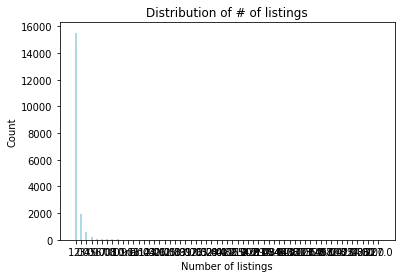

In [76]:
utils.plot_bar_graph(listings_count, 'number_of_man_listings', 'counts', 'Number of listings', 'Count', 'Distribution of # of listings')

In [77]:
ml_hosts, ml_listings, ml_reviews, ml_overall_guests, ml_retrieved_guests = pre.restrict_multiple_listings(hosts, listings, reviews, guests)

Revised number of Hosts: 15522 (decreased 16.70 %)
Revised number of Listings: 15522 (decreased 27.71 %)
Revised number of Reviews: 271729 (decreased 37.29 %)
Revised number of Overall Guests: 255027 (decreased 35.87 %)
Revised number of Retrieved Guests: 121901 (decreased 36.76 %)


# Remove Listings and Hosts with no reviews

In [78]:
new_hosts, new_listings = pre.remove_no_reviews(ml_hosts, ml_listings, ml_reviews)

Remove Listings with no reviews
Revised number of Listings: 12025 (decreased 22.53 %)
Remove Hosts with no reviews
Revised number of Hosts: 12025 (decreased 22.53 %)


# Remove Cancellations 

In [79]:
can_hosts = pre.add_cancellation_col(new_hosts, ml_reviews)

In [80]:
uc_new_hosts, uc_new_listings, uc_new_reviews, uc_new_overall_guests, uc_new_retrieved_guests = pre.remove_cancellations(can_hosts, new_listings, ml_reviews, ml_retrieved_guests)

Removing cancellation notifications from reviews
Revised number of Reviews: 264935 (decreased 2.50 %)
Revised number of Hosts: 11587 (decreased 3.64 %)
Revised number of Listings: 11587 (decreased 3.64 %)
Revised number of Overall Guests: 249495 (decreased 2.17 %)
Revised number of Retrieved Guests: 119609 (decreased 1.88 %)


# Add Review Length and Lang Detections

## Add Length

## Add Language Detections

files.save_all('len_lang', uc_new_retrieved_guests, uc_new_hosts, uc_new_listings, len_lang_reviews, uc_new_overall_guests)

## Retrieve from saved

In [81]:
len_lang_reviews = pd.read_csv('len_lang_reviews.csv', index_col=0)

In [82]:
len(len_lang_reviews)

295605

In [83]:
ll_reviews =  len_lang_reviews[len_lang_reviews['id'].isin(uc_new_reviews['id'].unique())]

In [84]:
len(ll_reviews)

264935

In [86]:
files.save_all('before_ll_restrict', uc_new_retrieved_guests, uc_new_hosts, uc_new_listings, ll_reviews, guestIDs=uc_new_overall_guests )

# Restrict Empty Comments

In [87]:
len_hosts, len_listings, len_reviews, len_overall_guests, len_retrieved_guests = pre.restrict_review_length(uc_new_hosts, uc_new_listings, ll_reviews, uc_new_retrieved_guests)

Removing empty(, None, nan) reviews
Revised number of Reviews: 264675 (decreased 0.10 %)
Removing reviews less than 5 words
Revised number of Reviews: 257166 (decreased 2.84 %)
Revised number of Hosts: 11510 (decreased 0.66 %)
Revised number of Listings: 11510 (decreased 0.66 %)
Revised number of Overall Guests: 242507 (decreased 2.80 %)
Revised number of Retrieved Guests: 117542 (decreased 1.73 %)


# Restrict Languages

In [90]:
en_hosts, en_listings, en_reviews, en_overall_guests, en_retrieved_guests = pre.restrict_review_langs(len_hosts, len_listings, len_reviews, len_retrieved_guests)

Removing reviews based on Language Restrictions
-Reviews that have 'English' language detection agreements between 'langdetect' and googletrans = 224173
-Reviews that contained emoticons in them preventing 'googletrans' from correct detection = 917
-Revised number of Reviews: 225090 (decreased 12.47 %)
Revised number of Hosts: 11333 (decreased 1.54 %)
Revised number of Listings: 11333 (decreased 1.54 %)
Revised number of Overall Guests: 211141 (decreased 12.93 %)
Revised number of Retrieved Guests: 102684 (decreased 12.64 %)


In [94]:
files.save_all('len_lang_restrict', en_retrieved_guests, en_hosts, en_listings, en_reviews, guestIDs=en_overall_guests)

# Number of reviews necessary 

In [109]:
nr_hosts, nr_listings, nr_reviews, nr_overall_guests, nr_retrieved_guests = pre.restrict_number_of_reviews(en_hosts, en_listings, en_reviews, en_retrieved_guests)

Revised number of Hosts: 6924 (decreased 38.90 %)
Revised number of Listings: 6924 (decreased 38.90 %)
Revised number of Reviews: 215960 (decreased 4.06 %)
Revised number of Overall Guests: 202989 (decreased 3.86 %)
Revised number of Retrieved Guests: 101288 (decreased 1.36 %)


In [121]:
files.save_all('nr_restrict', nr_retrieved_guests, nr_hosts, nr_listings, nr_reviews, guestIDs=nr_overall_guests)

# Number of People in Host Picture

In [110]:
host_num_people = pd.read_csv('hosts_with_people.csv', index_col=0)

In [119]:
pp_hosts, pp_listings, pp_reviews, pp_overall_guests, pp_retrieved_guests = pre.restrict_by_people_pic(host_num_people, nr_hosts, nr_listings, nr_reviews, nr_retrieved_guests)

Revised number of Hosts: 3504 (decreased 49.39 %)
Revised number of Listings: 3504 (decreased 49.39 %)
Revised number of Reviews: 104554 (decreased 51.59 %)
Revised number of Overall Guests: 100549 (decreased 50.47 %)
Revised number of Retrieved Guests: 50751 (decreased 49.89 %)


In [120]:
files.save_all('pp_restrict', pp_retrieved_guests, pp_hosts, pp_listings, pp_reviews, guestIDs=pp_overall_guests)

# POSSIBLY : Restrict by the reviews we have received

In [123]:
rec_hosts, rec_listings, rec_reviews = pre.restrict_by_received_guests(pp_hosts, pp_listings, pp_reviews, pp_retrieved_guests)

Restrict to only reviews from guests whose profile we have
Revised number of Reviews: 47553 (decreased 54.52 %)
Revised number of Hosts: 2554 (decreased 27.11 %)
Revised number of Listings: 2554 (decreased 27.11 %)


In [124]:
files.save_all('final_restrict', pp_retrieved_guests, rec_hosts, rec_listings, rec_reviews, guestIDs=pp_overall_guests)